## Introduction to Image Processing Techniques

In this notebook, we explore various image processing techniques, from fundamental concepts to advanced methods. Here, we will cover:

- **Segmentation by Clustering**: Techniques like K-means, DBScan, and Agglomerative clustering.
- **Applications**: Implementing short boundary detection and background subtraction.
- **Image Segmentation by Clustering Pixels**: Detailed exploration of clustering methods to segment images effectively.


## Image Segmentation Using K-means Clustering

This section demonstrates how to perform image segmentation using K-means clustering. Image segmentation is the process of partitioning an image into multiple segments to simplify or change the representation of an image into something more meaningful.

### Steps Followed:

1. **Image Loading**:
   - Load the image from a specified path and convert it to RGB color space for better processing.

2. **Reshape Image**:
   - Reshape the image from a 3D array (height, width, color channels) to a 2D array of pixels. This makes it suitable for applying K-means clustering.

3. **Apply K-means Clustering**:
   - Define the number of clusters (K) and apply K-means clustering to group similar pixels together.

4. **Reshape Segmented Image**:
   - Reshape the clustered pixels back to the original image dimensions to view the segmented image.

5. **Display Images**:
   - Use `matplotlib` to display the original and segmented images side-by-side for comparison.


In [9]:
from google.colab import files
uploaded = files.upload()


Saving image.jpg to image.jpg


Saving image.jpg to image (1).jpg


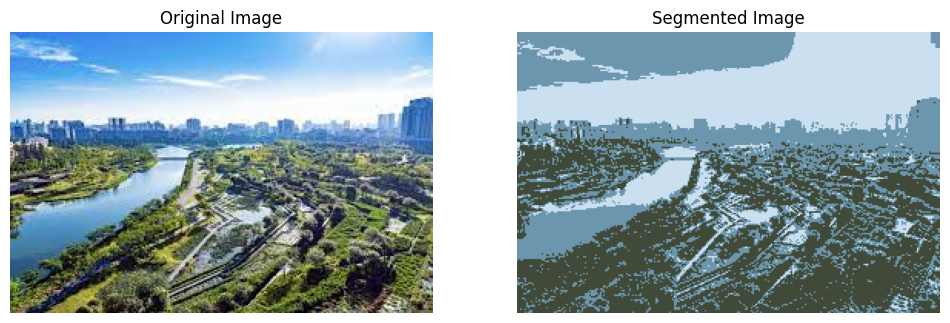

In [10]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the image path
image_path = list(uploaded.keys())[0]

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not loaded. Check the file path or upload.")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)
segmented_image = kmeans.cluster_centers_[labels]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)
segmented_image = segmented_image.astype(np.uint8)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()


## Enhanced Image Processing: Grayscale, Boundary Detection, and Background Subtraction

Building upon the previous code, this section introduces grayscale conversion, boundary detection, and background subtraction with a blue background.

### Steps Followed:

1. **Image Loading and Display**:
   - Load the image from a specified path, verify it's loaded correctly, and display it using `matplotlib`.

2. **Grayscale Conversion**:
   - Convert the RGB image to a grayscale image to simplify the boundary detection process.

3. **K-means Clustering for Segmentation**:
   - Similar to the previous code, apply K-means clustering to segment the image into different clusters.

4. **Boundary Detection**:
   - Use the Canny edge detection algorithm on the grayscale image to detect edges and display the result.

5. **Background Subtraction**:
   - Apply a mask to subtract the background, setting it to blue while keeping the foreground (greenery) intact.

6. **Display Processed Images**:
   - Display the original image, grayscale image, segmented image, edge detection result, and the final image with background subtraction using `matplotlib`.


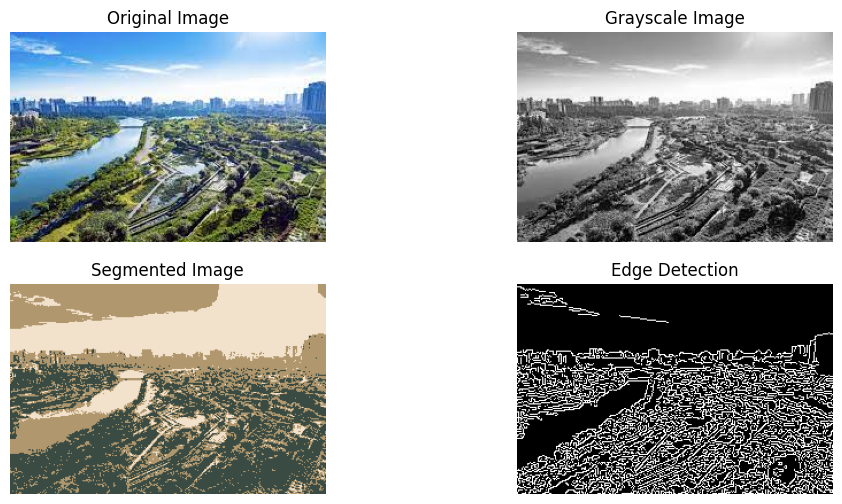

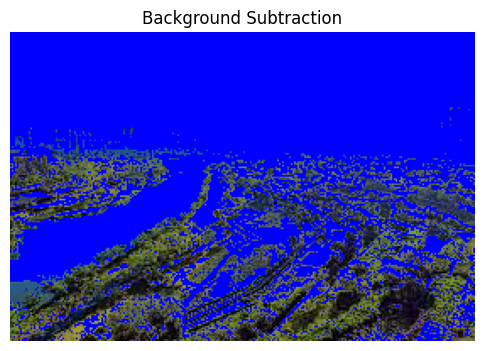

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the path to your image
image_path = '/content/image.jpg'  # Update this path to your image

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not loaded. Check the file path or upload.")

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.subplot(2, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Reshape the image to a 2D array of pixels for clustering
pixels = image.reshape(-1, 3)

# Number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)
segmented_image = kmeans.cluster_centers_[labels]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)
segmented_image = segmented_image.astype(np.uint8)

# Display the segmented image
plt.subplot(2, 2, 3)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

# Short boundary detection
edges = cv2.Canny(gray_image, 100, 200)

# Display the edges
plt.subplot(2, 2, 4)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Background subtraction (Blue background, Greenery foreground)
blue_background = np.zeros_like(image)
blue_background[:] = [255, 0, 0]  # Blue color
foreground_mask = (labels == np.argmin(np.sum(kmeans.cluster_centers_ - [34, 139, 34], axis=1))).reshape(image.shape[:2])
result_image = np.where(foreground_mask[..., None], image, blue_background)

# Display the result of background subtraction
plt.figure(figsize=(6, 6))
plt.title('Background Subtraction')
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
